In [ ]:
#The idea here is to compare season and price for all purchases and see the trend of maybe companies jacking prices at during times

In [3]:
import pandas as pd

file_path = 'shopping.csv'
df = pd.read_csv(file_path)

selected_columns = ['Season', 'Item Purchased', 'Purchase Amount (USD)', 'Review Rating', 'Gender']
new_df = df[selected_columns]
new_df.head()


,Season,Item Purchased,Purchase Amount (USD),Review Rating,Gender
0,Winter,Blouse,53,3.1,Male
1,Winter,Sweater,64,3.1,Male
2,Spring,Jeans,73,3.1,Male
3,Spring,Sandals,90,3.5,Male
4,Spring,Blouse,49,2.7,Male


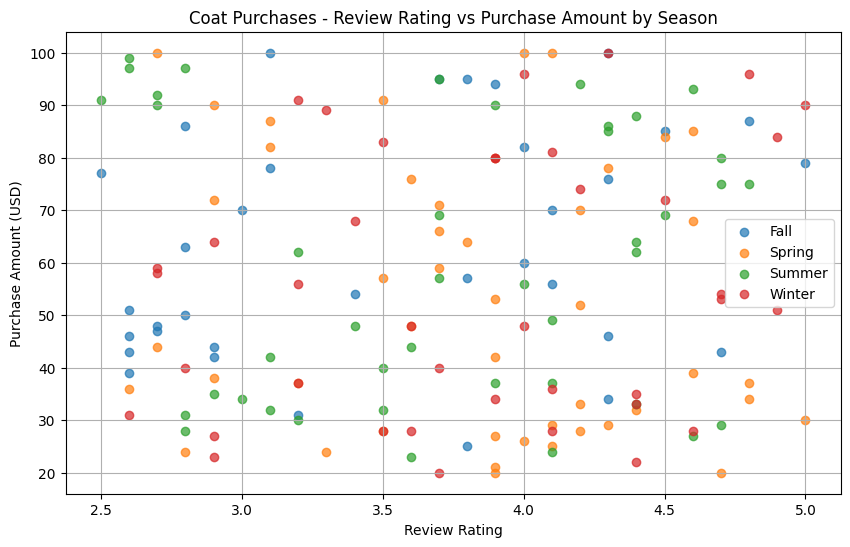

In [4]:

import matplotlib.pyplot as plt


file_path = 'shopping.csv'


df = pd.read_csv(file_path)


coat_data = df[df['Item Purchased'] == 'Coat']

# Group the data by Season
seasons_grouped = coat_data.groupby('Season')

# Create a Matplotlib figure
plt.figure(figsize=(10, 6))

# Plot each season's data with a different color
for season, season_data in seasons_grouped:
    plt.scatter(season_data['Review Rating'], season_data['Purchase Amount (USD)'],
                label=season, alpha=0.7)

# Set plot labels and title
plt.xlabel('Review Rating')
plt.ylabel('Purchase Amount (USD)')
plt.title('Coat Purchases - Review Rating vs Purchase Amount by Season')

plt.legend()
plt.grid(True)
plt.show()


In [9]:

# Group data by Season, Item Purchased, and calculate the average price
average_prices = df.groupby(['Season', 'Item Purchased'])['Purchase Amount (USD)'].mean().reset_index()

# Pivot the data to have items as rows and seasons as columns
pivot_table = average_prices.pivot_table(index='Item Purchased', columns='Season', values='Purchase Amount (USD)')

# Reorder the rows to display each item's prices under each season
pivot_table_sorted = pivot_table.reindex(['Winter', 'Spring', 'Summer', 'Fall'], axis=1, level=1)

# Display the sorted pivot table
print(pivot_table_sorted)


Season             Winter     Spring     Summer       Fall
Item Purchased                                            
Backpack        65.680000  56.564103  61.777778  59.058824
Belt            62.275000  57.512195  57.256410  62.268293
Blouse          58.325000  60.239130  60.837209  64.047619
Boots           66.322581  60.700000  62.500000  61.685714
Coat            55.512821  52.956522  60.023810  63.323529
Dress           63.375000  60.325581  58.404255  67.944444
Gloves          62.656250  58.880952  59.758621  61.243243
Handbag         61.088235  55.777778  56.857143  57.958333
Hat             57.325000  60.185185  60.351351  64.480000
Hoodie          59.375000  60.527778  53.322581  57.916667
Jacket          58.463415  56.828571  53.242424  57.518519
Jeans           63.206897  58.781250  59.419355  62.250000
Jewelry         57.617021  52.761905  63.957447  59.428571
Pants           58.803922  63.406250  57.720000  57.263158
Sandals         61.000000  54.181818  53.075000  62.2954

In [ ]:
"""From these different commands, we can assume the dataset is not based off real data and just generated. When I first plotted Coat prices 
vs review rating the colour being the season, there was no connection between anything on the whole graph. This required more digging, which 
I did. I found the average price of each item per season, which yeilded interesting results. All the items had a very similar price and no 
correlation to season. Socks and coats were the same prices give or take a few dollars, and coats were more expensive in summer than in winter."""